In [7]:
%%timeit
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Create KNN classifier
knn = KNeighborsClassifier()

# Grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output results
print("Best Parameters (Grid Search):", best_params)
print("Best Accuracy (Grid Search):", best_score)


Best Parameters (Grid Search): {'n_neighbors': 6}
Best Accuracy (Grid Search): 0.9800000000000001
Best Parameters (Grid Search): {'n_neighbors': 6}
Best Accuracy (Grid Search): 0.9800000000000001
Best Parameters (Grid Search): {'n_neighbors': 6}
Best Accuracy (Grid Search): 0.9800000000000001
Best Parameters (Grid Search): {'n_neighbors': 6}
Best Accuracy (Grid Search): 0.9800000000000001
Best Parameters (Grid Search): {'n_neighbors': 6}
Best Accuracy (Grid Search): 0.9800000000000001
Best Parameters (Grid Search): {'n_neighbors': 6}
Best Accuracy (Grid Search): 0.9800000000000001
Best Parameters (Grid Search): {'n_neighbors': 6}
Best Accuracy (Grid Search): 0.9800000000000001
Best Parameters (Grid Search): {'n_neighbors': 6}
Best Accuracy (Grid Search): 0.9800000000000001
548 ms ± 36.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fitness function
def knn_fitness(k):
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Ant Colony Optimization for KNN parameter tuning
def aco_parameter_tuning(num_ants, num_iterations, min_k, max_k, evaporation_rate=0.5, pheromone_constant=1.0):
    # Initialize pheromone matrix
    pheromone_matrix = np.ones(max_k - min_k + 1) / (max_k - min_k + 1)
    
    # Initialize best solution
    best_solution = None
    best_fitness = 0.0
    
    # Main loop
    for _ in range(num_iterations):
        # Generate solutions (ants)
        ants = np.random.randint(min_k, max_k + 1, size=num_ants)
        
        # Evaluate fitness
        fitness = np.array([knn_fitness(k) for k in ants])
        
        # Update pheromone levels
        for i in range(num_ants):
            pheromone_matrix[ants[i] - min_k] += pheromone_constant * fitness[i]
        
        # Select best solution
        if np.max(fitness) > best_fitness:
            best_solution = ants[np.argmax(fitness)]
            best_fitness = np.max(fitness)
    
    return best_solution, best_fitness

# Parameters
num_ants = 20
num_iterations = 100
min_k = 1
max_k = 20

# Run Ant Colony Optimization for parameter tuning
best_k, best_accuracy = aco_parameter_tuning(num_ants, num_iterations, min_k, max_k)

# Output results
print("Best K (Ant Colony Optimization):", best_k)
print("Best Accuracy (Ant Colony Optimization):", best_accuracy)


Best K (Ant Colony Optimization): 14
Best Accuracy (Ant Colony Optimization): 1.0
Best K (Ant Colony Optimization): 15
Best Accuracy (Ant Colony Optimization): 1.0
Best K (Ant Colony Optimization): 17
Best Accuracy (Ant Colony Optimization): 1.0
Best K (Ant Colony Optimization): 11
Best Accuracy (Ant Colony Optimization): 1.0
Best K (Ant Colony Optimization): 9
Best Accuracy (Ant Colony Optimization): 1.0
Best K (Ant Colony Optimization): 18
Best Accuracy (Ant Colony Optimization): 1.0
Best K (Ant Colony Optimization): 9
Best Accuracy (Ant Colony Optimization): 1.0
Best K (Ant Colony Optimization): 9
Best Accuracy (Ant Colony Optimization): 1.0
8.52 s ± 557 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# Output results
print("Best K (Ant Colony Optimization):", best_k)
print("Best Accuracy (Ant Colony Optimization):", best_accuracy)


Best K (Ant Colony Optimization): 12
Best Accuracy (Ant Colony Optimization): 0.9824561403508771


In [11]:
from sklearn.metrics import accuracy_score

# Train KNN classifier with the best_k value
best_k = best_k # Assuming you have obtained the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on training set
y_train_pred = knn_best.predict(X_train)
# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test set
y_test_pred = knn_best.predict(X_test)
# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Output training and testing accuracies
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)


Training Accuracy: 0.9318681318681319
Testing Accuracy: 0.9824561403508771


In [15]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fitness function
def svm_fitness(C, gamma):
    # Train SVM classifier
    svm = SVC(C=C, gamma=gamma)
    svm.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = svm.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Ant Colony Optimization for SVM parameter tuning
def aco_parameter_tuning(num_ants, num_iterations, min_C, max_C, min_gamma, max_gamma, evaporation_rate=0.5, pheromone_constant=1.0):
    # Initialize pheromone matrix
    pheromone_matrix = np.ones((max_C - min_C + 1, max_gamma - min_gamma + 1)) / ((max_C - min_C + 1) * (max_gamma - min_gamma + 1))
    
    # Initialize best solution
    best_solution = None
    best_fitness = 0.0
    
    # Main loop
    for _ in range(num_iterations):
        # Generate solutions (ants)
        Cs = np.random.uniform(min_C, max_C + 1, size=num_ants)
        gammas = np.random.uniform(min_gamma, max_gamma + 1, size=num_ants)
        
        # Evaluate fitness
        fitness = np.array([svm_fitness(Cs[i], gammas[i]) for i in range(num_ants)])
        
        # Update pheromone levels
        for i in range(num_ants):
            pheromone_matrix[int(Cs[i]) - min_C, int(gammas[i]) - min_gamma] += pheromone_constant * fitness[i]
        
        # Select best solution
        if np.max(fitness) > best_fitness:
            best_solution = (Cs[np.argmax(fitness)], gammas[np.argmax(fitness)])
            best_fitness = np.max(fitness)
    
    return best_solution, best_fitness

# Parameters
num_ants = 20
num_iterations = 100
min_C = 0.1
max_C = 10
min_gamma = 0.01
max_gamma = 1

# Run Ant Colony Optimization for parameter tuning
best_parameters, best_accuracy = aco_parameter_tuning(num_ants, num_iterations, min_C, max_C, min_gamma, max_gamma)

# Output results
print("Best Parameters (Ant Colony Optimization):", best_parameters)
print("Best Accuracy (Ant Colony Optimization):", best_accuracy)

# Train SVM classifier with best parameters
svm_best = SVC(C=best_parameters[0], gamma=best_parameters[1])
svm_best.fit(X_train, y_train)

# Evaluate on test set
y_pred_svm = svm_best.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Testing Accuracy (SVM with Optimal Parameters):", accuracy_svm)


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fitness function
def svm_fitness(C, gamma):
    # Train SVM classifier
    svm = SVC(C=C, gamma=gamma)
    svm.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = svm.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Ant Colony Optimization for SVM parameter tuning
def aco_parameter_tuning(num_ants, num_iterations, min_C, max_C, min_gamma, max_gamma, evaporation_rate=0.5, pheromone_constant=1.0):
    # Initialize pheromone matrix
    pheromone_matrix = np.ones((max_C - min_C + 1, max_gamma - min_gamma + 1)) / ((max_C - min_C + 1) * (max_gamma - min_gamma + 1))
    
    # Initialize best solution
    best_solution = None
    best_fitness = 0.0
    
    # Main loop
    for _ in range(num_iterations):
        # Generate solutions (ants)
        Cs = np.random.uniform(min_C, max_C + 1, size=num_ants)
        gammas = np.random.uniform(min_gamma, max_gamma + 1, size=num_ants)
        
        # Evaluate fitness
        fitness = np.array([svm_fitness(Cs[i], gammas[i]) for i in range(num_ants)])
        
        # Update pheromone levels
        for i in range(num_ants):
            pheromone_matrix[int(Cs[i]) - min_C, int(gammas[i]) - min_gamma] += pheromone_constant * fitness[i]
        
        # Select best solution
        if np.max(fitness) > best_fitness:
            best_solution = (Cs[np.argmax(fitness)], gammas[np.argmax(fitness)])
            best_fitness = np.max(fitness)
    
    return best_solution, best_fitness

# Parameters
num_ants = 20
num_iterations = 100
min_C = 0.1
max_C = 10
min_gamma = 0.01
max_gamma = 1

# Run Ant Colony Optimization for parameter tuning
best_parameters, best_accuracy = aco_parameter_tuning(num_ants, num_iterations, min_C, max_C, min_gamma, max_gamma)

# Output results
print("Best Parameters (Ant Colony Optimization):", best_parameters)
print("Best Accuracy (Ant Colony Optimization):", best_accuracy)

# Train SVM classifier with best parameters
svm_best = SVC(C=best_parameters[0], gamma=best_parameters[1])
svm_best.fit(X_train, y_train)

# Evaluate on test set
y_pred_svm = svm_best.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Testing Accuracy (SVM with Optimal Parameters):", accuracy_svm)


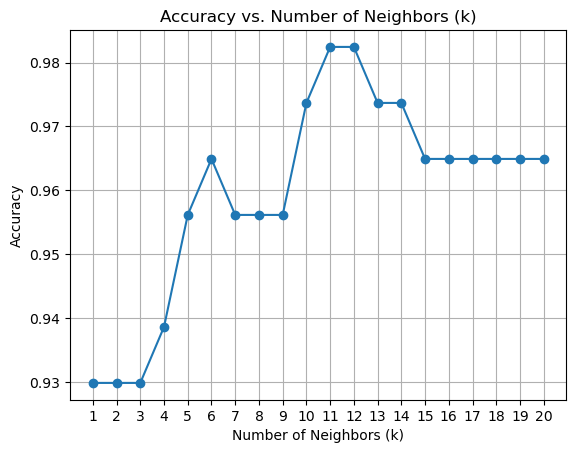

Optimal k value: 11
Testing Accuracy with Optimal k: 0.9824561403508771


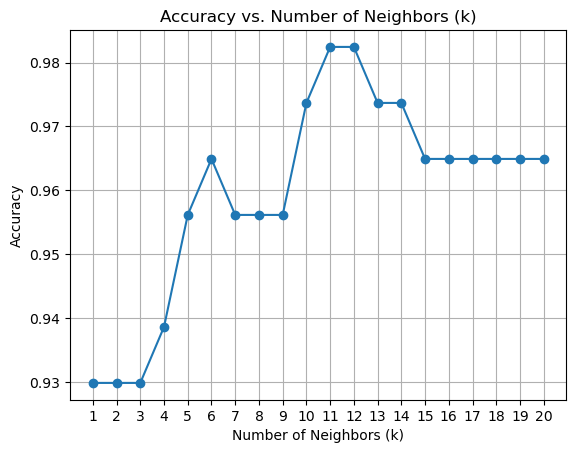

Optimal k value: 11
Testing Accuracy with Optimal k: 0.9824561403508771


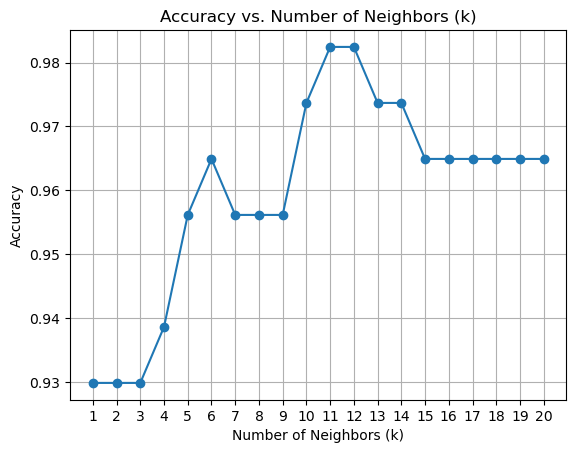

Optimal k value: 11
Testing Accuracy with Optimal k: 0.9824561403508771


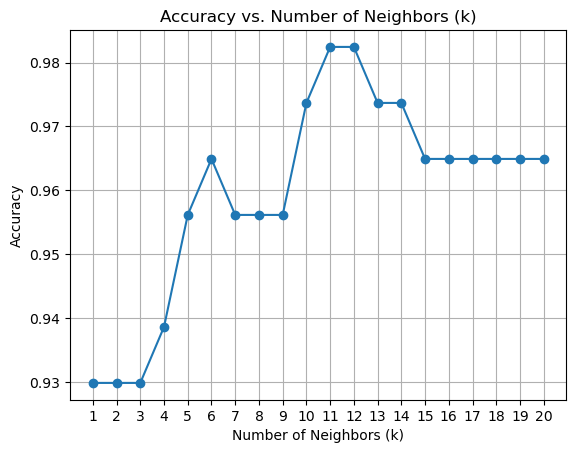

Optimal k value: 11
Testing Accuracy with Optimal k: 0.9824561403508771


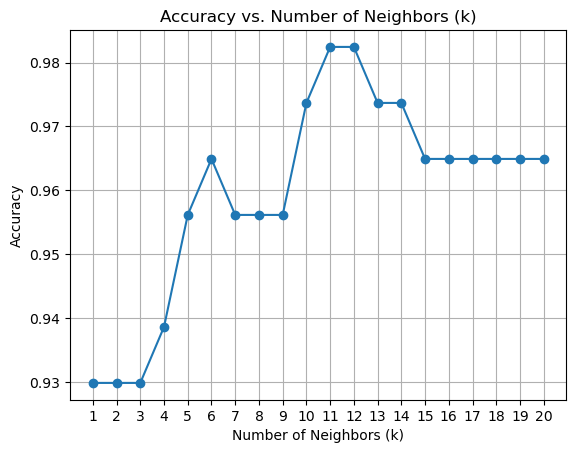

Optimal k value: 11
Testing Accuracy with Optimal k: 0.9824561403508771


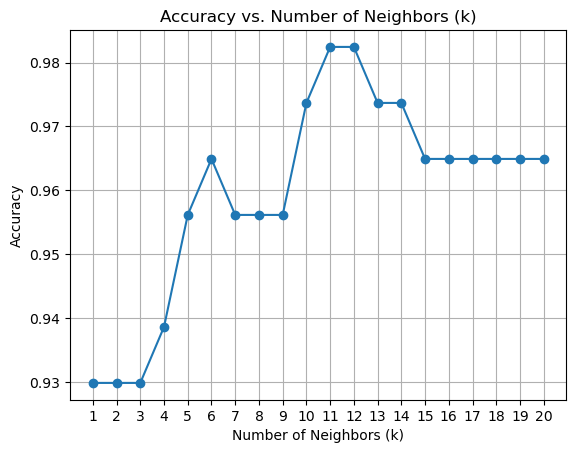

Optimal k value: 11
Testing Accuracy with Optimal k: 0.9824561403508771


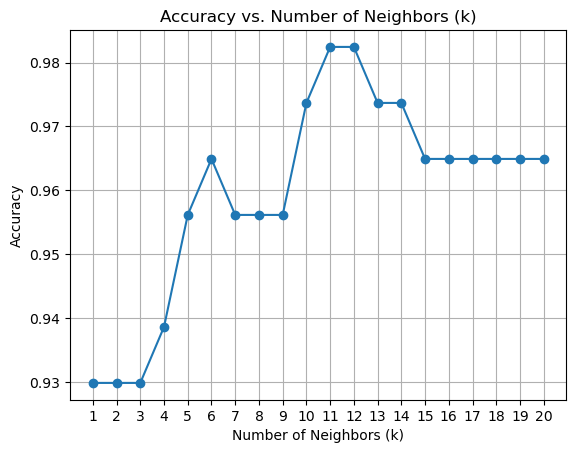

Optimal k value: 11
Testing Accuracy with Optimal k: 0.9824561403508771


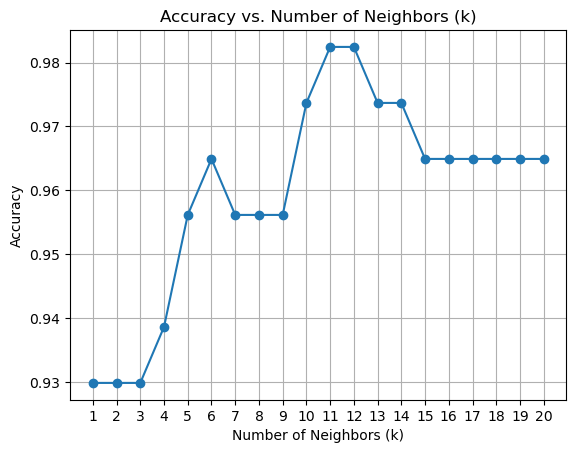

Optimal k value: 11
Testing Accuracy with Optimal k: 0.9824561403508771
1.47 s ± 47.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of k values to evaluate
k_values = range(1, 21)

# Initialize lists to store accuracy scores
accuracy_scores = []

# Evaluate KNN classifier for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot accuracy scores
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal k value with the highest accuracy
optimal_k = k_values[np.argmax(accuracy_scores)]
print("Optimal k value:", optimal_k)

# Train KNN classifier with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Predict on test set
y_pred_optimal = knn_optimal.predict(X_test)
# Calculate testing accuracy with the optimal k value
testing_accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print("Testing Accuracy with Optimal k:", testing_accuracy_optimal)


In [14]:
%%timeit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ACO parameters
num_ants = 20
num_iterations = 50
min_k = 1
max_k = 20
evaporation_rate = 0.5
pheromone_constant = 1.0

# Define fitness function (accuracy of KNN classifier)
def knn_fitness(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Ant Colony Optimization for KNN parameter tuning
def aco_parameter_tuning(num_ants, num_iterations, min_k, max_k, evaporation_rate=0.5, pheromone_constant=1.0):
    # Initialize pheromone matrix
    pheromone_matrix = np.ones(max_k - min_k + 1) / (max_k - min_k + 1)
    
    # Initialize best solution
    best_solution = None
    best_fitness = 0.0
    
    # Main loop
    for _ in range(num_iterations):
        # Generate solutions (ants)
        ants = np.random.randint(min_k, max_k + 1, size=num_ants)
        
        # Evaluate fitness
        fitness = np.array([knn_fitness(k) for k in ants])
        
        # Update pheromone levels
        for i in range(num_ants):
            pheromone_matrix[ants[i] - min_k] += pheromone_constant * fitness[i]
        
        # Select best solution
        if np.max(fitness) > best_fitness:
            best_solution = ants[np.argmax(fitness)]
            best_fitness = np.max(fitness)
    
    return best_solution, best_fitness

# Run Ant Colony Optimization for parameter tuning
best_k, best_accuracy = aco_parameter_tuning(num_ants, num_iterations, min_k, max_k)

# Output results
print("Best k value (Ant Colony Optimization):", best_k)
print("Best Accuracy (Ant Colony Optimization):", best_accuracy)

# Train KNN classifier with the best k value
knn_optimal = KNeighborsClassifier(n_neighbors=best_k)
knn_optimal.fit(X_train, y_train)

# Predict on test set
y_pred_optimal = knn_optimal.predict(X_test)
# Calculate testing accuracy with the best k value
testing_accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print("Testing Accuracy with Optimal k (ACO):", testing_accuracy_optimal)


Best k value (Ant Colony Optimization): 11
Best Accuracy (Ant Colony Optimization): 0.9824561403508771
Testing Accuracy with Optimal k (ACO): 0.9824561403508771
Best k value (Ant Colony Optimization): 12
Best Accuracy (Ant Colony Optimization): 0.9824561403508771
Testing Accuracy with Optimal k (ACO): 0.9824561403508771
Best k value (Ant Colony Optimization): 11
Best Accuracy (Ant Colony Optimization): 0.9824561403508771
Testing Accuracy with Optimal k (ACO): 0.9824561403508771
Best k value (Ant Colony Optimization): 12
Best Accuracy (Ant Colony Optimization): 0.9824561403508771
Testing Accuracy with Optimal k (ACO): 0.9824561403508771
Best k value (Ant Colony Optimization): 11
Best Accuracy (Ant Colony Optimization): 0.9824561403508771
Testing Accuracy with Optimal k (ACO): 0.9824561403508771
Best k value (Ant Colony Optimization): 12
Best Accuracy (Ant Colony Optimization): 0.9824561403508771
Testing Accuracy with Optimal k (ACO): 0.9824561403508771
Best k value (Ant Colony Optimizat

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fitness function
def rf_fitness(n_estimators, max_depth):
    # Train Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Ant Colony Optimization for Random Forest parameter tuning
def aco_parameter_tuning(num_ants, num_iterations, min_estimators, max_estimators, min_depth, max_depth, evaporation_rate=0.5, pheromone_constant=1.0):
    # Initialize pheromone matrix
    pheromone_matrix = np.ones((max_estimators - min_estimators + 1, max_depth - min_depth + 1)) / ((max_estimators - min_estimators + 1) * (max_depth - min_depth + 1))
    
    # Initialize best solution
    best_solution = None
    best_fitness = 0.0
    
    # Main loop
    for _ in range(num_iterations):
        # Generate solutions (ants)
        estimators = np.random.randint(min_estimators, max_estimators + 1, size=num_ants)
        depths = np.random.randint(min_depth, max_depth + 1, size=num_ants)
        
        # Evaluate fitness
        fitness = np.array([rf_fitness(estimators[i], depths[i]) for i in range(num_ants)])
        
        # Update pheromone levels
        for i in range(num_ants):
            pheromone_matrix[estimators[i] - min_estimators, depths[i] - min_depth] += pheromone_constant * fitness[i]
        
        # Select best solution
        if np.max(fitness) > best_fitness:
            best_solution = (estimators[np.argmax(fitness)], depths[np.argmax(fitness)])
            best_fitness = np.max(fitness)
    
    return best_solution, best_fitness

# Parameters
num_ants = 20
num_iterations = 100
min_estimators = 10
max_estimators = 100
min_depth = 1
max_depth = 10

# Run Ant Colony Optimization for parameter tuning
best_parameters, best_accuracy = aco_parameter_tuning(num_ants, num_iterations, min_estimators, max_estimators, min_depth, max_depth)

# Output results
print("Best Parameters (Ant Colony Optimization):", best_parameters)
print("Best Accuracy (Ant Colony Optimization):", best_accuracy)

# Train Random Forest classifier with best parameters
rf_best = RandomForestClassifier(n_estimators=best_parameters[0], max_depth=best_parameters[1], random_state=42)
rf_best.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = rf_best.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Testing Accuracy (Random Forest with Optimal Parameters):", accuracy_rf)
